In [1]:
import cv2
from scipy.signal import medfilt
from scipy import ndimage
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def cal_skyline(mask):
    h, w = mask.shape
    for i in range(w):
        raw = mask[:, i]
        after_median = medfilt(raw, 19)
        try:
            first_zero_index = np.where(after_median == 0)[0][0]
            first_one_index = np.where(after_median == 1)[0][0]
            if first_zero_index > 20:
                mask[first_one_index:first_zero_index, i] = 1
                mask[first_zero_index:, i] = 0
                mask[:first_one_index, i] = 0
        except:
            continue
    return mask

In [3]:
def get_sky_region_gradient(img):

    h, w, _ = img.shape

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img_gray = cv2.blur(img_gray, (9, 3))
    cv2.medianBlur(img_gray, 5)
    lap = cv2.Laplacian(img_gray, cv2.CV_8U)
    gradient_mask = (lap < 6).astype(np.uint8)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))

    mask = cv2.morphologyEx(gradient_mask, cv2.MORPH_ERODE, kernel)
    # plt.imshow(mask)
    # plt.show()
    mask = cal_skyline(mask)
    after_img = cv2.bitwise_and(img, img, mask=mask)

    return after_img

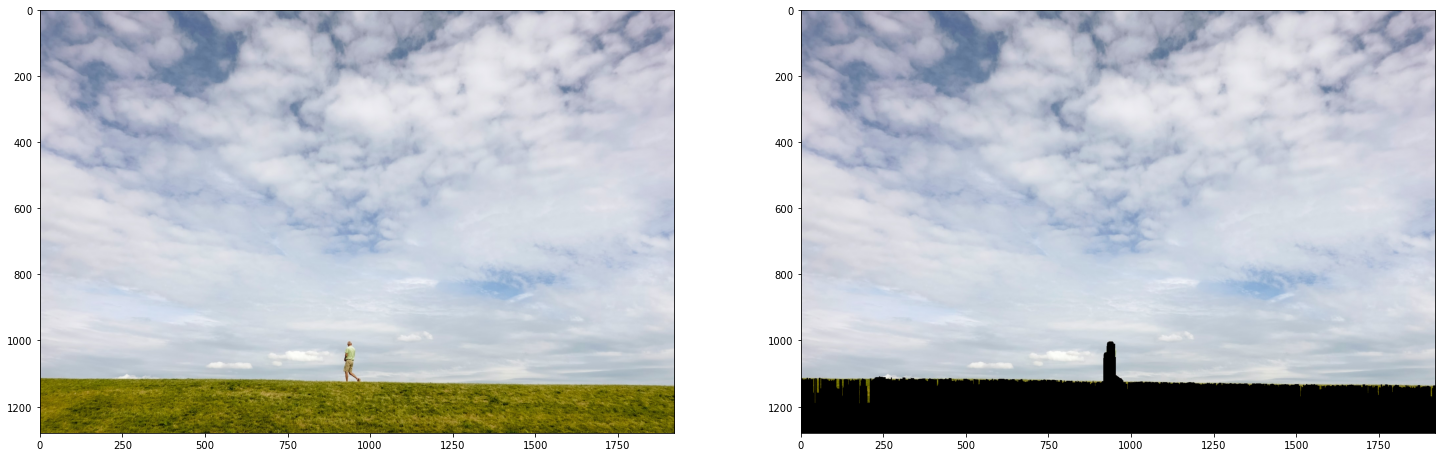

In [16]:
img = cv2.imread("images/sky5.jpg")[:,:,::-1]
plt.figure(figsize=(25,35))
plt.subplot(1,2,1)
plt.imshow(img)

img_sky = get_sky_region_gradient(img)
plt.subplot(1,2,2)
plt.imshow(img_sky)
plt.show()